## kNN classifiers

### Imports and global variables

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import *
from IPython.display import display

import imp
plotter = imp.load_source('plotter', '/Users/katbishop/Desktop/DSI-SF2-bishopkd/utils/plotting/knn_plotter.py')
from plotter import KNNBoundaryPlotter

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV

plt.style.use('fivethirtyeight')
%matplotlib inline

path = '/Users/katbishop/Desktop/DSI-SF2-bishopkd/projects/capstone/data/'

#### Load the data

In [5]:
# load training data
df = pd.read_csv(path + 'df.csv')
del df['Unnamed: 0']
#del df['Unnamed: 0.1']

# load held-out testing data
df_test = pd.read_csv(path + 'df_test.csv')
del df_test['Unnamed: 0']
print df.shape
print df_test.shape

(77, 48)
(11, 48)


In [33]:
# subset the data
sf = df[df['sci_fi']==1]
rm = df[df['sci_fi']==0]
sfbs = df[((df['best_seller']==1) & (df['sci_fi']==1))]
rmbs = df[((df['best_seller']==1) & (df['sci_fi']==0))]
sff = df[((df['best_seller']==0) & (df['sci_fi']==1))]
rmf = df[((df['best_seller']==0) & (df['sci_fi']==0))]


sf_test= df_test[df_test['sci_fi']==1]
rm_test= df_test[df_test['sci_fi']==0]
sfbs_test = df_test[((df_test['best_seller']==1) & (df_test['sci_fi']==1))]
rmbs_test= df_test[((df_test['best_seller']==1) & (df_test['sci_fi']==0))]
sff_test= df_test[((df_test['best_seller']==0) & (df_test['sci_fi']==1))]
rmf_test= df_test[((df_test['best_seller']==0) & (df_test['sci_fi']==0))]

#### Science-fiction

In [77]:
y_sf = sf['best_seller'].values
X_sf = sf[['avg_sent_len', 'avg_word_len', 'lex_diversity', 'polarity','subjectivity', 'profane']].values

y_sf_test = sf_test['best_seller']
X_sf_test = sf_test[['avg_sent_len','avg_word_len', 'lex_diversity', 'polarity','subjectivity', 'profane']]

print y_sf.shape, X_sf.shape
print y_sf_test.shape, X_sf_test.shape

(39,) (39, 6)
(8,) (8, 6)


In [79]:
def accuracy_crossvalidator(X, y, knn, cv_indices):
    scores = []
    for train_i, test_i in cv_indices:
        
        X_train = X[train_i, :]
        X_test = X[test_i, :]
        y_train = y[train_i]
        y_test = y[test_i]

        knn.fit(X_train, y_train)
        acc = knn.score(X_test, y_test)
        scores.append(acc)
        
        print('Fold accuracy:', acc)    
    print('Mean CV accuracy:', np.mean(scores))

In [91]:
cv = StratifiedKFold(y_sf, n_folds=10)
knn_sf = KNeighborsClassifier(n_neighbors=3, weights='distance')
accuracy_crossvalidator(X_sf, y_sf, knn_sf, cv)

('Fold accuracy:', 0.75)
('Fold accuracy:', 0.75)
('Fold accuracy:', 0.75)
('Fold accuracy:', 0.0)
('Fold accuracy:', 0.75)
('Fold accuracy:', 0.25)
('Fold accuracy:', 0.5)
('Fold accuracy:', 0.75)
('Fold accuracy:', 0.0)
('Fold accuracy:', 0.66666666666666663)
('Mean CV accuracy:', 0.51666666666666672)


In [88]:
search_parameters = {
    'n_neighbors': range(1,12), 
    'weights':      ['uniform','distance']
}

knn = KNeighborsClassifier() 
knn_gs = GridSearchCV(knn, search_parameters, cv=10, verbose=1)

knn_gs.fit(X_sf, y_sf)
print knn_gs.best_params_
best_knn = knn_gs.best_estimator_
print best_knn
accuracy_crossvalidator(X_sf, y_sf, best_knn, cv)

Fitting 10 folds for each of 22 candidates, totalling 220 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.2s


{'n_neighbors': 5, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
('Fold accuracy:', 0.83333333333333337)
('Fold accuracy:', 0.80000000000000004)
('Fold accuracy:', 0.5)
('Fold accuracy:', 0.5)
('Fold accuracy:', 0.5)
('Fold accuracy:', 0.5)
('Fold accuracy:', 0.75)
('Fold accuracy:', 0.5)
('Fold accuracy:', 0.5)
('Mean CV accuracy:', 0.5981481481481481)


[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:    0.6s finished


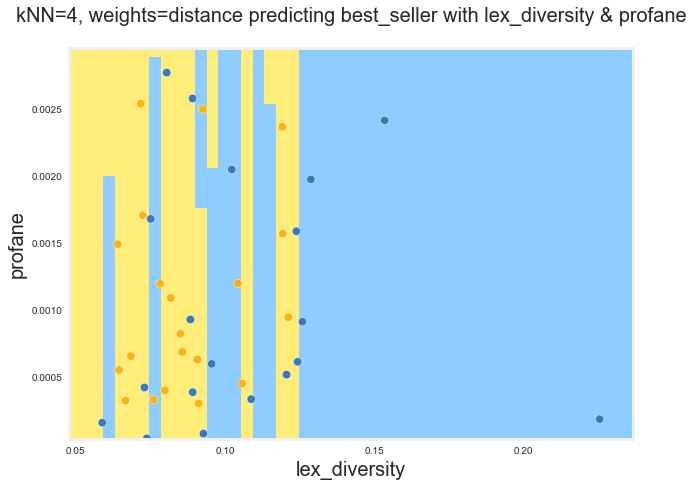

In [61]:
kbp = KNNBoundaryPlotter(sf, 'lex_diversity', 'profane', 'best_seller', nn_range=range(1,38))
kbp.knn_mesh_runner()
kbp.knn_interact()

#### Romance

In [75]:
y_rm = rm['best_seller'].values
X_rm = rm[['avg_sent_len', 'avg_word_len', 'lex_diversity', 'polarity','subjectivity', 'profane']].values

y_rm_test = rm_test['best_seller']
X_rm_test = rm_test[['avg_sent_len','avg_word_len', 'lex_diversity', 'polarity','subjectivity', 'profane']]

print y_rm.shape, X_rm.shape
print y_rm_test.shape, X_rm_test.shape

(38,) (38, 6)
(3,) (3, 6)


In [89]:
cv_rm = StratifiedKFold(y_rm, n_folds=10)
knn_rm = KNeighborsClassifier(n_neighbors=3, weights='uniform')
accuracy_crossvalidator(X_rm, y_rm, knn_rm, cv_rm)

('Fold accuracy:', 0.25)
('Fold accuracy:', 0.25)
('Fold accuracy:', 1.0)
('Fold accuracy:', 0.25)
('Fold accuracy:', 0.75)
('Fold accuracy:', 0.25)
('Fold accuracy:', 0.25)
('Fold accuracy:', 0.5)
('Fold accuracy:', 0.66666666666666663)
('Fold accuracy:', 1.0)
('Mean CV accuracy:', 0.51666666666666672)


In [90]:
search_parameters = {
    'n_neighbors': range(1,12), 
    'weights':      ['uniform','distance']
}

knn_rm = KNeighborsClassifier() 
knn_rm_gs = GridSearchCV(knn_rm, search_parameters, cv=10, verbose=1)

knn_rm_gs.fit(X_rm, y_rm)
print knn_rm_gs.best_params_
best_knn_rm = knn_rm_gs.best_estimator_
print best_knn_rm
accuracy_crossvalidator(X_rm, y_rm, best_knn_rm, cv_rm)

Fitting 10 folds for each of 22 candidates, totalling 220 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.2s


{'n_neighbors': 3, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')
('Fold accuracy:', 0.75)
('Fold accuracy:', 0.25)
('Fold accuracy:', 1.0)
('Fold accuracy:', 0.25)
('Fold accuracy:', 0.75)
('Fold accuracy:', 0.5)
('Fold accuracy:', 0.25)
('Fold accuracy:', 0.5)
('Fold accuracy:', 1.0)
('Fold accuracy:', 1.0)
('Mean CV accuracy:', 0.625)


[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:    0.7s finished
